In [2]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# === CONFIG ===
csv_paths = ["Updated_CSVS/WTS_updated.csv", "Updated_CSVS/EDS_updated.csv", "Updated_CSVS/ES_updated.csv"]
drop_cols = ['gradient', 'intercept', 'filename', 'path_length']
label_col = 'track_type'
cv = 3
rows_per_file = 2000

# === Load, Drop NaN Columns, and Label Data ===
dfs = []
for i, f in enumerate(csv_paths):
    df_i = pd.read_csv(f)
    df_i = df_i.dropna(axis=1)                   # Drop columns with any NaNs
    df_i = df_i.head(rows_per_file)              # Take first 2000 rows after column clean
    df_i[label_col] = i + 1                      # Assign label
    dfs.append(df_i)

df = pd.concat(dfs, ignore_index=True).dropna()  # Drop remaining rows with NaNs

# === Drop, Encode & Scale ===
X = df.drop(columns=drop_cols + [label_col])
y = df[label_col]

# Label encoding for categorical features
X = X.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

# MinMax scaling
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Align index with X
y = y.reset_index(drop=True)

# === Models ===
models = {
    'RF': RandomForestClassifier(),
    'GB': GradientBoostingClassifier(),
    'LR': LogisticRegression(max_iter=3000),
    'MLP': MLPClassifier(max_iter=1000),
    'SVM': SVC()
}

# === Pairwise Comparisons ===
for a, b in [(1, 2), (1, 3), (2, 3)]:
    print(f"\n-- {a} vs {b} --")
    mask = y.isin([a, b])
    X_pair, y_pair = X[mask], y[mask].replace({a: 0, b: 1})

    for name, model in models.items():
        acc = cross_val_score(model, X_pair, y_pair, cv=cv, scoring='accuracy').mean()
        print(f"{name}: {acc:.3f}")





-- 1 vs 2 --
RF: 0.816
GB: 0.816
LR: 0.765
MLP: 0.807
SVM: 0.783

-- 1 vs 3 --
RF: 0.880
GB: 0.882
LR: 0.868
MLP: 0.874
SVM: 0.872

-- 2 vs 3 --
RF: 0.676
GB: 0.684
LR: 0.664
MLP: 0.678
SVM: 0.668


In [2]:
pd.read_csv("Updated_CSVS/WTS_updated.csv")

,track_type,filename,gradient,intercept,mean_log_velocity,stddev_log_velocity,max_log_velocity,min_log_velocity,mean_acceleration,stddev_acceleration,max_acceleration,min_acceleration,reorientations_per_sec,mean_curvature,stddev_curvature,max_curvature,tortuosity,path_length
0,WTS,WTS_track38214_0_processed.txt,2.000019,8.529307,4.262989,0.040250,4.331180,4.133449,4.849512,111.160858,266.639225,-237.657986,NaN,7.583183,7.560281,15.870000,1.017117,105.544903
1,WTS,WTS_track140743_0_processed.txt,1.999946,8.399044,4.188777,0.116105,4.333012,3.566121,0.362103,146.682271,486.028009,-452.160463,0.985222,14.203827,14.120999,28.820000,1.205496,67.299148
2,WTS,WTS_track21129_0_processed.txt,1.999499,8.137657,4.029087,0.203619,4.501249,3.575945,-14.970193,194.652756,470.797349,-476.267009,3.896104,3.925669,3.872029,8.545000,1.058474,88.302300
3,WTS,WTS_track2544_0_processed.txt,1.896643,3.959737,1.722046,0.765015,3.148840,-0.308978,6.921813,465.456550,2540.146236,-3184.632797,4.844291,5.708644,18.426896,217.962105,13.248057,10.634635
4,WTS,WTS_track48742_0_processed.txt,1.998393,8.314339,4.158472,0.045695,4.263121,4.031214,6.571037,104.010529,295.009497,-245.540366,1.425178,10.572699,10.543460,22.150000,1.061154,134.802753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22658,WTS,WTS_track2584_0_processed.txt,1.995997,7.358535,3.679599,0.094473,3.931632,3.455917,0.899273,151.154760,443.567570,-369.027016,7.000000,0.473468,0.403947,1.310000,1.088531,39.815146
22659,WTS,WTS_track104863_0_processed.txt,1.992958,7.808272,3.913386,0.077722,4.208881,3.732427,-6.670365,116.103444,341.448587,-376.018534,12.456747,10.762705,10.624074,22.095000,1.079110,72.572313
22660,WTS,WTS_track2703_0_processed.txt,1.971684,6.327724,3.182171,0.195999,3.648735,2.550547,10.136094,415.717311,1522.001028,-913.574307,7.742998,2.040955,2.165274,6.835000,1.133093,149.120971
22661,WTS,WTS_track260_0 (3)_processed.txt,1.949188,4.357539,2.083519,0.455461,3.248174,0.955574,6.588337,160.215961,397.386732,-414.448351,6.250000,1.560263,2.030572,19.104656,1.496662,17.104170


In [8]:
from sklearn.model_selection import GridSearchCV

# Grid of hyperparameters to try
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2]
}

# You can replace (1, 2) with (1, 3) or (2, 3) as needed
a, b = 1, 3
print(f"\n-- Grid Search RF: {a} vs {b} --")

mask = y.isin([a, b])
X_pair, y_pair = X[mask], y[mask].replace({a: 0, b: 1})

# Set up grid search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

# Fit
grid_search.fit(X_pair, y_pair)

# Best result
print("Best accuracy:", round(grid_search.best_score_, 3))
print("Best parameters:", grid_search.best_params_)



-- Grid Search RF: 1 vs 3 --
Best accuracy: 0.879
Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [3]:
from sklearn.model_selection import GridSearchCV

for a, b in [(1, 2), (1, 3), (2, 3)]:
    print(f"\n-- Grid Search RF: {a} vs {b} --")
    mask = y.isin([a, b])
    X_pair, y_pair = X[mask], y[mask].replace({a: 0, b: 1})

    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }

    grid_search = GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid=param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1  # Shows progress
    )

    grid_search.fit(X_pair, y_pair)
    print("Best accuracy:", round(grid_search.best_score_, 3))
    print("Best params:", grid_search.best_params_)



-- Grid Search RF: 1 vs 2 --
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best accuracy: 0.824
Best params: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}

-- Grid Search RF: 1 vs 3 --
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best accuracy: 0.884
Best params: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}

-- Grid Search RF: 2 vs 3 --
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best accuracy: 0.699
Best params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

for a, b in [(1, 2), (1, 3), (2, 3)]:
    print(f"\n-- Grid Search GB: {a} vs {b} --")
    mask = y.isin([a, b])
    X_pair, y_pair = X[mask], y[mask].replace({a: 0, b: 1})

    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(
        estimator=GradientBoostingClassifier(),
        param_grid=param_grid,
        cv=3,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_pair, y_pair)
    print("Best accuracy:", round(grid_search.best_score_, 3))
    print("Best params:", grid_search.best_params_)



-- Grid Search GB: 1 vs 2 --
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best accuracy: 0.812
Best params: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}

-- Grid Search GB: 1 vs 3 --
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best accuracy: 0.88
Best params: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

-- Grid Search GB: 2 vs 3 --
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best accuracy: 0.692
Best params: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [11]:
import pandas as pd

# Load CSV
df = pd.read_csv("Updated_CSVS/WTS_updated.csv")

# Count NaNs per column
nan_counts = df.isna().sum()

# Print summary
print("NaNs per column:")
print(nan_counts)
print("\nTotal NaNs in file:", nan_counts.sum())


NaNs per column:
track_type                   0
filename                     0
gradient                     0
intercept                    0
mean_log_velocity            0
stddev_log_velocity          0
max_log_velocity             0
min_log_velocity             0
mean_acceleration            0
stddev_acceleration          0
max_acceleration             0
min_acceleration             0
reorientations_per_sec    1637
mean_curvature              11
stddev_curvature            11
max_curvature               11
tortuosity                   0
path_length                  0
dtype: int64

Total NaNs in file: 1670


In [12]:
import pandas as pd

# Load CSV
df = pd.read_csv("Updated_CSVS/EDS_updated.csv")

# Count NaNs per column
nan_counts = df.isna().sum()

# Print summary
print("NaNs per column:")
print(nan_counts)
print("\nTotal NaNs in file:", nan_counts.sum())

NaNs per column:
track_type                  0
filename                    0
gradient                    0
intercept                   0
mean_log_velocity           0
stddev_log_velocity         0
max_log_velocity            0
min_log_velocity            0
mean_acceleration           0
stddev_acceleration         0
max_acceleration            0
min_acceleration            0
reorientations_per_sec    117
mean_curvature             56
stddev_curvature           56
max_curvature              56
tortuosity                  0
path_length                 0
dtype: int64

Total NaNs in file: 285


In [13]:
import pandas as pd

# Load CSV
df = pd.read_csv("Updated_CSVS/ES_updated.csv")

# Count NaNs per column
nan_counts = df.isna().sum()

# Print summary
print("NaNs per column:")
print(nan_counts)
print("\nTotal NaNs in file:", nan_counts.sum())

NaNs per column:
track_type                 0
filename                   0
gradient                   0
intercept                  0
mean_log_velocity          0
stddev_log_velocity        0
max_log_velocity           0
min_log_velocity           0
mean_acceleration          0
stddev_acceleration        0
max_acceleration           0
min_acceleration           0
reorientations_per_sec     8
mean_curvature            98
stddev_curvature          98
max_curvature             98
tortuosity                 0
path_length                0
dtype: int64

Total NaNs in file: 302


,14.395 241.44398 268.40131 246.35614 241.51423 268.52679 246.45215
0,14.4 241.56118 268.63572 246.26207 241.84133 2...
1,14.405000000000001 242.088605 268.98734 246.12...
2,14.41 242.61603 269.33896 245.97803 242.49472 ...
3,14.415 242.96765 269.33896 245.97942 242.82022...
4,14.42 243.08485 269.57338 246.25749 243.14449 ...
...,...
292,15.86 333.89591 311.25176 235.4268 333.97807 3...
293,15.865 334.03657 311.29863 234.52153 334.25564...
294,15.87 334.27099 311.29863 235.73653 334.53311 ...
295,15.875 334.7398 311.53305 234.57035 334.81073 ...


In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import precision_recall_curve, accuracy_score, roc_auc_score

def evaluate_rf_thresholds(csv_paths, labels, output_csv, plot_dir, num_runs=3, thresholds=np.arange(0.01, 1.0, 0.01)):
    results = []

    if not os.path.exists(plot_dir):
        os.makedirs(plot_dir)

    # Load and label each CSV
    dfs = []
    for i, path in enumerate(csv_paths):
        df = pd.read_csv(path).dropna()
        df["track_type"] = labels[i]
        dfs.append(df)

    full_df = pd.concat(dfs, ignore_index=True)

    # Columns to drop
    drop_cols = [col for col in ['gradient', 'intercept', 'filename', 'path_length', 'min_curvature', 'std_curvature'] if col in full_df.columns]

    # Pair-specific RF hyperparameters
    pairs_and_params = {
        ('WT', 'EWD'): {
            'max_depth': 10, 'max_features': 'log2',
            'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300
        },
        ('WT', 'EWOD'): {
            'max_depth': None, 'max_features': 'log2',
            'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200
        },
        ('EWD', 'EWOD'): {
            'max_depth': None, 'max_features': 'sqrt',
            'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300
        }
    }

    for (a, b), rf_params in pairs_and_params.items():
        print(f"\n--- Evaluating RF Thresholds: {a} vs {b} ---")

        # Filter data for the two classes
        df_pair = full_df[full_df['track_type'].isin([a, b])]
        df_a = df_pair[df_pair['track_type'] == a]
        df_b = df_pair[df_pair['track_type'] == b]

        # Downsample to balance
        min_len = min(len(df_a), len(df_b))
        df_a = df_a.sample(n=min_len, random_state=42)
        df_b = df_b.sample(n=min_len, random_state=42)
        df_balanced = pd.concat([df_a, df_b]).sample(frac=1, random_state=42).reset_index(drop=True)

        # Preprocess
        X = df_balanced.drop(columns=drop_cols + ['track_type'])
        y = df_balanced['track_type'].replace({a: 0, b: 1})
        X = X.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)
        X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)

        # Metric storage
        precision_dict = {t: [] for t in thresholds}
        recall_dict = {t: [] for t in thresholds}
        accuracy_dict = {t: [] for t in thresholds}
        roc_auc_list = []

        # Run multiple times for stability
        for run in range(num_runs):
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, stratify=y, random_state=run
            )

            rf = RandomForestClassifier(**rf_params)
            rf.fit(X_train, y_train)

            y_probs = rf.predict_proba(X_test)[:, 1]
            roc_auc = roc_auc_score(y_test, y_probs)
            roc_auc_list.append(roc_auc)

            precision, recall, threshold_values = precision_recall_curve(y_test, y_probs)

            for threshold in thresholds:
                y_pred = (y_probs >= threshold).astype(int)
                accuracy = accuracy_score(y_test, y_pred)

                closest_idx = np.searchsorted(threshold_values, threshold, side="right") - 1
                precision_val = precision[closest_idx] if closest_idx >= 0 else np.nan
                recall_val = recall[closest_idx] if closest_idx >= 0 else np.nan

                precision_dict[threshold].append(precision_val)
                recall_dict[threshold].append(recall_val)
                accuracy_dict[threshold].append(accuracy)

        # Average results across runs
        avg_precision = {t: np.nanmean(precision_dict[t]) for t in thresholds}
        avg_recall = {t: np.nanmean(recall_dict[t]) for t in thresholds}
        avg_accuracy = {t: np.nanmean(accuracy_dict[t]) for t in thresholds}
        avg_roc_auc = np.mean(roc_auc_list)

        # Print peak accuracy and its threshold
        best_threshold = max(avg_accuracy, key=avg_accuracy.get)
        best_accuracy = avg_accuracy[best_threshold]
        print(f"Best Accuracy for {a} vs {b}: {best_accuracy:.4f} at Threshold = {best_threshold:.2f}")

        # Save individual threshold results
        for threshold in thresholds:
            results.append({
                "Pair": f"{a} vs {b}",
                "Threshold": threshold,
                "Precision": avg_precision[threshold],
                "Recall": avg_recall[threshold],
                "Accuracy": avg_accuracy[threshold],
                "ROC_AUC": avg_roc_auc
            })

        # Plot metrics vs threshold
        plt.figure(figsize=(8, 6))
        plt.plot(thresholds, list(avg_precision.values()), label="Precision", marker="o", markersize=2)
        plt.plot(thresholds, list(avg_recall.values()), label="Recall", marker="s", markersize=2)
        plt.plot(thresholds, list(avg_accuracy.values()), label="Accuracy", marker="d", markersize=2)
        plt.axhline(avg_roc_auc, color="r", linestyle="--", label=f"ROC AUC: {avg_roc_auc:.3f}")
        plt.xlabel("Decision Threshold")
        plt.ylabel("Score")
        plt.title(f"{a} vs {b} — RF Scores vs Threshold")
        plt.legend()
        plt.grid(True)

        # Save plot
        plot_file = f"{a}_vs_{b}_RF_Threshold_Curve.png".replace(" ", "_")
        plt.savefig(os.path.join(plot_dir, plot_file), dpi=600)
        plt.close()
        print(f"Saved plot: {plot_file}")

    # Save all results to CSV
    results_df = pd.DataFrame(results)
    results_df.to_csv(output_csv, index=False)
    print(f"\nAll RF threshold results saved to: {output_csv}")

# === RUN ===
csv_paths = [
    "Updated_CSVS/WTS_updated.csv",
    "Updated_CSVS/EDS_updated.csv",
    "Updated_CSVS/ES_updated.csv"
]
labels = ["WT", "EWD", "EWOD"]
output_csv = "RF_thresholds_pairwise_results.csv"
plot_dir = "RF_Threshold_Plots_new_2"

evaluate_rf_thresholds(csv_paths, labels, output_csv, plot_dir)







--- Evaluating RF Thresholds: WT vs EWD ---
Best Accuracy for WT vs EWD: 0.8335 at Threshold = 0.49
Saved plot: WT_vs_EWD_RF_Threshold_Curve.png

--- Evaluating RF Thresholds: WT vs EWOD ---
Best Accuracy for WT vs EWOD: 0.8898 at Threshold = 0.49
Saved plot: WT_vs_EWOD_RF_Threshold_Curve.png

--- Evaluating RF Thresholds: EWD vs EWOD ---
Best Accuracy for EWD vs EWOD: 0.7022 at Threshold = 0.49
Saved plot: EWD_vs_EWOD_RF_Threshold_Curve.png

All RF threshold results saved to: RF_thresholds_pairwise_results.csv



--- Feature Addition Evaluation: WT vs EWD ---


/var/folders/xh/j0bmy0552qv0bnf229qgt6v40000gn/T/ipykernel_53887/803822843.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df_balanced['track_type'].replace({a: 0, b: 1})



--- Feature Addition Evaluation: WT vs EWOD ---


/var/folders/xh/j0bmy0552qv0bnf229qgt6v40000gn/T/ipykernel_53887/803822843.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df_balanced['track_type'].replace({a: 0, b: 1})



--- Feature Addition Evaluation: EWD vs EWOD ---


/var/folders/xh/j0bmy0552qv0bnf229qgt6v40000gn/T/ipykernel_53887/803822843.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df_balanced['track_type'].replace({a: 0, b: 1})


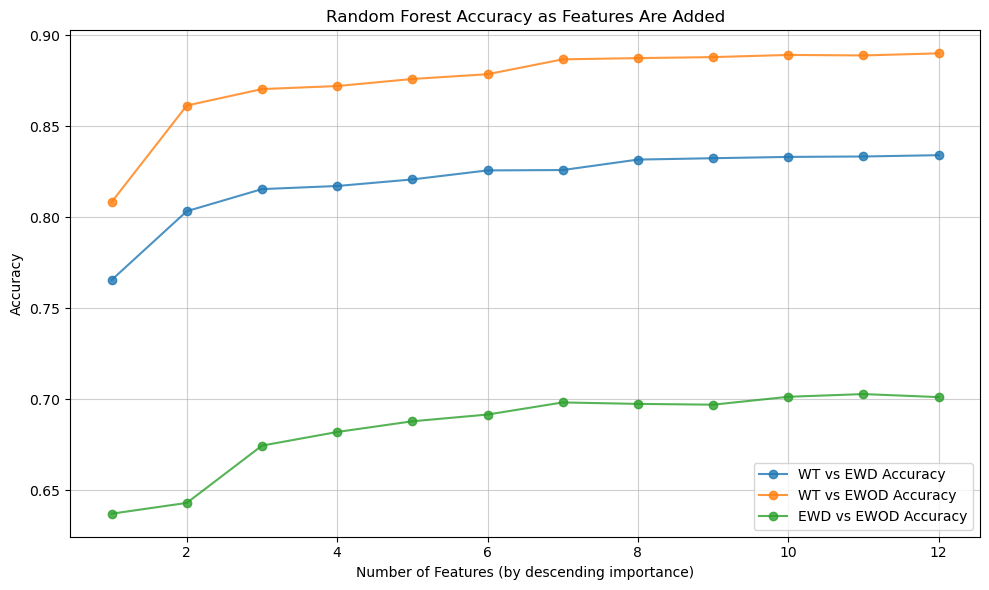


Saved accuracy plot to: RF_feature_addition_combined_plot.png


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, roc_auc_score

def evaluate_feature_addition(csv_paths, labels, output_csv, plot_path, num_runs=3):
    results = []
    dfs = []

    # Load and label data
    for i, path in enumerate(csv_paths):
        df = pd.read_csv(path).dropna()
        df["track_type"] = labels[i]
        dfs.append(df)

    full_df = pd.concat(dfs, ignore_index=True)
    drop_cols = [col for col in ['gradient', 'intercept', 'filename', 'path_length', 'min_curvature', 'std_curvature', 'stddev_curvature'] if col in full_df.columns]

    # Pairwise comparison parameters
    pairs_and_params = {
        ('WT', 'EWD'): {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300},
        ('WT', 'EWOD'): {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200},
        ('EWD', 'EWOD'): {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
    }

    # Store all curves for combined plot
    all_curves = []

    for (a, b), rf_params in pairs_and_params.items():
        print(f"\n--- Feature Addition Evaluation: {a} vs {b} ---")

        # Balance dataset
        df_pair = full_df[full_df['track_type'].isin([a, b])]
        df_a = df_pair[df_pair['track_type'] == a]
        df_b = df_pair[df_pair['track_type'] == b]
        min_len = min(len(df_a), len(df_b))
        df_balanced = pd.concat([
            df_a.sample(n=min_len, random_state=42),
            df_b.sample(n=min_len, random_state=42)
        ]).sample(frac=1, random_state=42).reset_index(drop=True)

        # Prepare features
        X_full = df_balanced.drop(columns=drop_cols + ['track_type'])
        y = df_balanced['track_type'].replace({a: 0, b: 1})
        X_full = X_full.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)
        X_full = pd.DataFrame(MinMaxScaler().fit_transform(X_full), columns=X_full.columns)

        # Get feature importance ranking
        X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, stratify=y, random_state=0)
        rf = RandomForestClassifier(**rf_params)
        rf.fit(X_train, y_train)
        importances = rf.feature_importances_
        sorted_features = X_full.columns[np.argsort(importances)[::-1]]

        acc_list, auc_list = [], []

        # Evaluate performance as features are added
        for i in range(1, len(sorted_features) + 1):
            sel_features = sorted_features[:i]
            acc_runs, auc_runs = [], []

            for run in range(num_runs):
                X_train, X_test, y_train, y_test = train_test_split(
                    X_full[sel_features], y, test_size=0.2, stratify=y, random_state=run
                )

                rf = RandomForestClassifier(**rf_params, n_jobs=-1)
                rf.fit(X_train, y_train)

                y_probs = rf.predict_proba(X_test)[:, 1]
                y_pred = rf.predict(X_test)

                acc_runs.append(accuracy_score(y_test, y_pred))
                auc_runs.append(roc_auc_score(y_test, y_probs))

            acc_mean = np.mean(acc_runs)
            auc_mean = np.mean(auc_runs)
            acc_list.append(acc_mean)
            auc_list.append(auc_mean)

            results.append({
                "Pair": f"{a} vs {b}",
                "Num_Features": i,
                "Accuracy": acc_mean,
                "ROC_AUC": auc_mean
            })

        all_curves.append({
            "pair": f"{a} vs {b}",
            "acc": acc_list,
            "auc": auc_list
        })

    # === Plot all on one graph ===
    # === Plot all accuracy scatter plots on one graph ===
    plt.figure(figsize=(10, 6))

    for curve in all_curves:
        num_features = range(1, len(curve["acc"]) + 1)
        plt.plot(num_features, curve["acc"], label=f"{curve['pair']} Accuracy", marker='o', alpha=0.8)

    plt.xlabel("Number of Features (by descending importance)")
    plt.ylabel("Accuracy")
    plt.title("Random Forest Accuracy as Features Are Added")
    plt.legend()
    plt.grid(True, linestyle='-', alpha=0.6)
    plt.tight_layout()
    plt.savefig(plot_path, dpi=600)
    plt.show()
    print(f"\nSaved accuracy plot to: {plot_path}")

# === RUN ===
csv_paths = [
    "Updated_CSVS/WTS_updated.csv",
    "Updated_CSVS/EDS_updated.csv",
    "Updated_CSVS/ES_updated.csv"
]
labels = ["WT", "EWD", "EWOD"]
output_csv = "RF_feature_addition_results_combined.csv"
plot_path = "RF_feature_addition_combined_plot.png"

evaluate_feature_addition(csv_paths, labels, output_csv, plot_path)



In [7]:
pd.read_csv('Updated_CSVS/')

,track_type,filename,gradient,intercept,mean_log_velocity,stddev_log_velocity,max_log_velocity,min_log_velocity,mean_acceleration,stddev_acceleration,max_acceleration,min_acceleration,reorientations_per_sec,stddev_curvature,tortuosity,path_length,mean_curvature,std_curvature,min_curvature,max_curvature
0,WTS,WTS_track38214_0_processed.txt,2.000019,8.529307,4.262989,0.040250,4.331180,4.133449,4.849512,111.160858,266.639225,-237.657986,NaN,7.560281,1.017117,105.544903,0.028865,0.014124,2.204953e-03,0.069388
1,WTS,WTS_track140743_0_processed.txt,1.999946,8.399044,4.188777,0.116105,4.333012,3.566121,0.362103,146.682271,486.028009,-452.160463,0.985222,14.120999,1.205496,67.299148,0.085153,0.219127,4.849651e-03,1.644065
2,WTS,WTS_track21129_0_processed.txt,1.999499,8.137657,4.029087,0.203619,4.501249,3.575945,-14.970193,194.652756,470.797349,-476.267009,3.896104,3.872029,1.058474,88.302300,0.066337,0.050472,6.164088e-03,0.264030
3,WTS,WTS_track2544_0_processed.txt,1.896643,3.959737,1.722046,0.765015,3.148840,-0.308978,6.921813,465.456550,2540.146236,-3184.632797,4.844291,18.426896,13.248057,10.634635,9.974788,25.348188,1.326558e-12,217.962105
4,WTS,WTS_track48742_0_processed.txt,1.998393,8.314339,4.158472,0.045695,4.263121,4.031214,6.571037,104.010529,295.009497,-245.540366,1.425178,10.543460,1.061154,134.802753,0.037898,0.032262,1.252159e-03,0.238287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22658,WTS,WTS_track2584_0_processed.txt,1.995997,7.358535,3.679599,0.094473,3.931632,3.455917,0.899273,151.154760,443.567570,-369.027016,7.000000,0.403947,1.088531,39.815146,0.126936,0.072986,1.453719e-13,0.297459
22659,WTS,WTS_track104863_0_processed.txt,1.992958,7.808272,3.913386,0.077722,4.208881,3.732427,-6.670365,116.103444,341.448587,-376.018534,12.456747,10.624074,1.079110,72.572313,0.142909,0.106771,2.265052e-16,0.606438
22660,WTS,WTS_track2703_0_processed.txt,1.971684,6.327724,3.182171,0.195999,3.648735,2.550547,10.136094,415.717311,1522.001028,-913.574307,7.742998,2.165274,1.133093,149.120971,0.271910,0.250063,0.000000e+00,2.082478
22661,WTS,WTS_track260_0 (3)_processed.txt,1.949188,4.357539,2.083519,0.455461,3.248174,0.955574,6.588337,160.215961,397.386732,-414.448351,6.250000,2.030572,1.496662,17.104170,2.150526,2.692064,3.134473e-02,19.104656


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load and label each dataset
def load_and_label(path, label):
    df = pd.read_csv(path)
    df["track_type"] = label
    return df

# File paths
file1 = "Updated_CSVS/WTS_updated.csv"
file2 = "Updated_CSVS/"

# Load datasets
df1 = load_and_label(file1, "WT_vs_ES")
df2 = load_and_label(file2, "WT_vs_EDS")

# Combine datasets
df = pd.concat([df1, df2], ignore_index=True)

# Drop filename column if present
df = df.drop(columns=["filename"], errors="ignore")

# Label encode track_type
encoder = LabelEncoder()
df["track_type"] = encoder.fit_transform(df["track_type"])

# Define feature order (can be adjusted)
ordered_features = [
    "track_type",
    "mean_log_velocity", "max_log_velocity", "min_log_velocity", "stddev_log_velocity",
    "mean_acceleration", "max_acceleration", "min_acceleration", "stddev_acceleration",
    "mean_curvature", "max_curvature", "stddev_curvature",
    "reorientations_per_sec", "tortuosity", "path_length",
    "gradient", "intercept"
]

# Drop any missing features gracefully
ordered_features = [f for f in ordered_features if f in df.columns]

# Apply MinMax scaling (excluding track_type)
scaler = MinMaxScaler()
features_to_scale = [f for f in ordered_features if f != "track_type"]
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Rename features for readability
rename_dict = {
    "track_type": "Track Type",
    "gradient": "Gradient",
    "intercept": "Y-Intercept",
    "mean_log_velocity": "Mean Log Velocity",
    "stddev_log_velocity": "Std Dev Log Velocity",
    "max_log_velocity": "Max Log Velocity",
    "min_log_velocity": "Min Log Velocity",
    "mean_acceleration": "Mean Acceleration",
    "stddev_acceleration": "Std Dev Acceleration",
    "max_acceleration": "Max Acceleration",
    "min_acceleration": "Min Acceleration",
    "reorientations_per_sec": "Reorientation Rate",
    "mean_curvature": "Mean Curvature",
    "stddev_curvature": "Std Dev Curvature",
    "max_curvature": "Max Curvature",
    "tortuosity": "Tortuosity",
    "path_length": "Path Length"
}

df_renamed = df[ordered_features].rename(columns=rename_dict)

# Correlation matrix
corr_matrix = df_renamed.corr()
corr_matrix = corr_matrix.rename(index=rename_dict, columns=rename_dict)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,
    cbar_kws={"shrink": 0.8}, square=True
)

plt.title("Feature Correlation Matrix (WT vs Mutants)", fontsize=14)
plt.xticks(rotation=30, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig("corr_mat_combined.pdf")
plt.show()


ValueError: Input X contains infinity or a value too large for dtype('float64').


--- PCA Component Addition Evaluation: WT vs EWD ---

--- PCA Component Addition Evaluation: WT vs EWOD ---

--- PCA Component Addition Evaluation: EWD vs EWOD ---


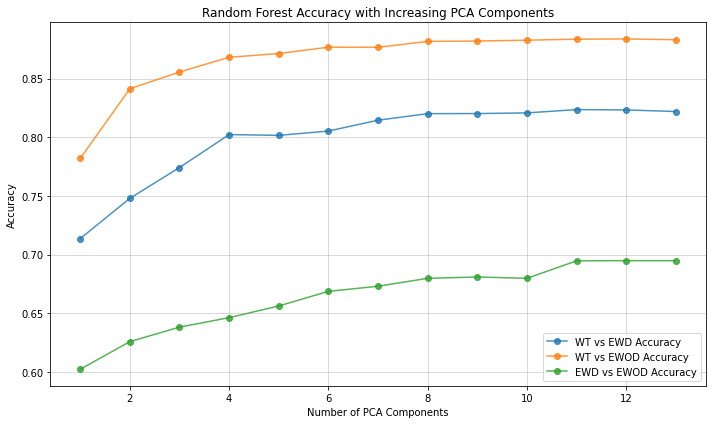


Saved accuracy plot to: RF_PCA_component_addition_plot.png


In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.decomposition import PCA

def evaluate_pca_addition(csv_paths, labels, output_csv, plot_path, num_runs=3):
    results = []
    dfs = []

    # Load and label data
    for i, path in enumerate(csv_paths):
        df = pd.read_csv(path).dropna()
        df["track_type"] = labels[i]
        dfs.append(df)

    full_df = pd.concat(dfs, ignore_index=True)
    drop_cols = [col for col in ['gradient', 'intercept', 'filename', 'path_length', 'min_curvature', 'std_curvature'] if col in full_df.columns]

    # Pairwise comparison parameters
    pairs_and_params = {
        ('WT', 'EWD'): {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300},
        ('WT', 'EWOD'): {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200},
        ('EWD', 'EWOD'): {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
    }

    all_curves = []

    for (a, b), rf_params in pairs_and_params.items():
        print(f"\n--- PCA Component Addition Evaluation: {a} vs {b} ---")

        # Balance dataset
        df_pair = full_df[full_df['track_type'].isin([a, b])]
        df_a = df_pair[df_pair['track_type'] == a]
        df_b = df_pair[df_pair['track_type'] == b]
        min_len = min(len(df_a), len(df_b))
        df_balanced = pd.concat([
            df_a.sample(n=min_len, random_state=42),
            df_b.sample(n=min_len, random_state=42)
        ]).sample(frac=1, random_state=42).reset_index(drop=True)

        # Prepare features
        X_full = df_balanced.drop(columns=drop_cols + ['track_type'])
        y = df_balanced['track_type'].replace({a: 0, b: 1})
        X_full = X_full.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)
        X_scaled = MinMaxScaler().fit_transform(X_full)

        # Apply PCA
        pca = PCA()
        X_pca = pca.fit_transform(X_scaled)

        acc_list, auc_list = [], []

        # Evaluate performance as PCA components are added
        for i in range(1, X_pca.shape[1] + 1):
            acc_runs, auc_runs = [], []

            for run in range(num_runs):
                X_train, X_test, y_train, y_test = train_test_split(
                    X_pca[:, :i], y, test_size=0.2, stratify=y, random_state=run
                )

                rf = RandomForestClassifier(**rf_params, n_jobs=-1)
                rf.fit(X_train, y_train)

                y_probs = rf.predict_proba(X_test)[:, 1]
                y_pred = rf.predict(X_test)

                acc_runs.append(accuracy_score(y_test, y_pred))
                auc_runs.append(roc_auc_score(y_test, y_probs))

            acc_mean = np.mean(acc_runs)
            auc_mean = np.mean(auc_runs)
            acc_list.append(acc_mean)
            auc_list.append(auc_mean)

            results.append({
                "Pair": f"{a} vs {b}",
                "Num_Components": i,
                "Accuracy": acc_mean,
                "ROC_AUC": auc_mean
            })

        all_curves.append({
            "pair": f"{a} vs {b}",
            "acc": acc_list,
            "auc": auc_list
        })

    # === Plot all accuracy curves ===
    plt.figure(figsize=(10, 6))

    for curve in all_curves:
        num_components = range(1, len(curve["acc"]) + 1)
        plt.plot(num_components, curve["acc"], label=f"{curve['pair']} Accuracy", marker='o', alpha=0.8)

    plt.xlabel("Number of PCA Components")
    plt.ylabel("Accuracy")
    plt.title("Random Forest Accuracy with Increasing PCA Components")
    plt.legend()
    plt.grid(True, linestyle='-', alpha=0.6)
    plt.tight_layout()
    plt.savefig(plot_path, dpi=600)
    plt.show()
    print(f"\nSaved accuracy plot to: {plot_path}")

# === RUN ===
csv_paths = [
    "Updated_CSVS/WTS_updated.csv",
    "Updated_CSVS/EDS_updated.csv",
    "Updated_CSVS/ES_updated.csv"
]
labels = ["WT", "EWD", "EWOD"]
output_csv = "RF_PCA_component_addition_results.csv"
plot_path = "RF_PCA_component_addition_plot.png"

evaluate_pca_addition(csv_paths, labels, output_csv, plot_path)



--- Showing Tree & Metrics: WT vs EWOD ---


/var/folders/xh/j0bmy0552qv0bnf229qgt6v40000gn/T/ipykernel_22953/2599357535.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df_balanced['track_type'].replace({a: 0, b: 1})


Training Accuracy: 0.875
Test Accuracy:     0.873

Classification Report (Test):
              precision    recall  f1-score   support

          WT       0.92      0.81      0.86     10508
        EWOD       0.83      0.93      0.88     10507

    accuracy                           0.87     21015
   macro avg       0.88      0.87      0.87     21015
weighted avg       0.88      0.87      0.87     21015



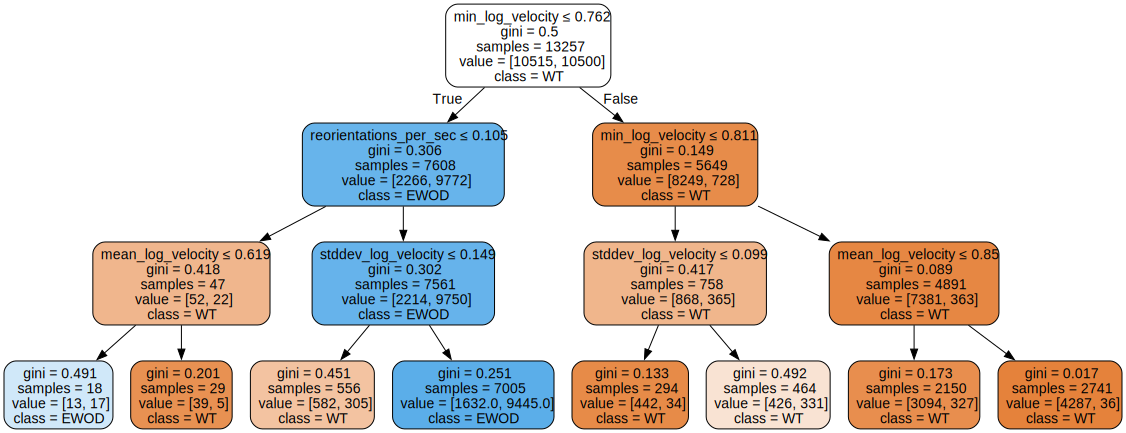

Saved tree as Example_RF_Trees/WT_vs_EWOD_tree.png


In [22]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import export_graphviz
from IPython.display import display
import graphviz

def show_wt_vs_ewod_tree(csv_paths, labels, save_dir=None):
    if save_dir and not os.path.exists(save_dir):
        os.makedirs(save_dir)

    dfs = []
    for i, path in enumerate(csv_paths):
        df = pd.read_csv(path).dropna()
        df["track_type"] = labels[i]
        dfs.append(df)

    full_df = pd.concat(dfs, ignore_index=True)

    # Only run for WT vs EWOD
    a, b = 'WT', 'EWOD'
    rf_params = {
        'max_depth': 3,
        'max_features': 'log2',
        'min_samples_leaf': 1,
        'min_samples_split': 5,
        'n_estimators': 200,
        'n_jobs': -1
    }

    drop_cols = [col for col in ['gradient', 'intercept', 'filename', 'path_length', 'min_curvature', 'std_curvature', 'mean_curvature', 'stddev_curvature'] if col in full_df.columns]

    print(f"\n--- Showing Tree & Metrics: {a} vs {b} ---")
    df_pair = full_df[full_df['track_type'].isin([a, b])]
    df_a = df_pair[df_pair['track_type'] == a]
    df_b = df_pair[df_pair['track_type'] == b]
    min_len = min(len(df_a), len(df_b))
    df_balanced = pd.concat([
        df_a.sample(n=min_len, random_state=42),
        df_b.sample(n=min_len, random_state=42)
    ]).sample(frac=1, random_state=42).reset_index(drop=True)

    X = df_balanced.drop(columns=drop_cols + ['track_type'])
    y = df_balanced['track_type'].replace({a: 0, b: 1})
    X = X.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)
    X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=0)

    rf = RandomForestClassifier(**rf_params)
    rf.fit(X_train, y_train)
    tree = rf.estimators_[0]

    # Metrics
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)

    print(f"Training Accuracy: {acc_train:.3f}")
    print(f"Test Accuracy:     {acc_test:.3f}")
    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_test_pred, target_names=[a, b]))

    # Tree visual
    dot_data = export_graphviz(
        tree,
        out_file=None,
        feature_names=X.columns,
        class_names=[a, b],
        filled=True,
        rounded=True,
        special_characters=True
    )

    graph = graphviz.Source(dot_data)
    display(graph)

    if save_dir:
        file_path = os.path.join(save_dir, f"{a}_vs_{b}_tree")
        graph.render(file_path, format="png", cleanup=True)
        print(f"Saved tree as {file_path}.png")

# === RUN ===
csv_paths = [
    "Updated_CSVS/WTS_updated.csv",
    "Updated_CSVS/EDS_updated.csv",
    "Updated_CSVS/ES_updated.csv"
]
labels = ["WT", "EWD", "EWOD"]

show_wt_vs_ewod_tree(csv_paths, labels, save_dir="Example_RF_Trees")


In [3]:
import os
os.environ["PATH"] += os.pathsep + "/opt/homebrew/bin"

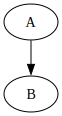

In [4]:
from graphviz import Source
Source('digraph G { A -> B }')


In [17]:
df = pd.read_csv("Updated_CSVS/ES_updated.csv")

In [18]:
if (df['mean_curvature'] <= 0).any():
    print(df['mean_curvature'])
